In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pyMRI.pymri as pymri

In [5]:
metabolites = pymri.METABOLITES
met_i = 1

t0, tn, dt, B0 = pymri.setup_sim_t(0.0, 1.0, 2048, 3.0)

ws, t2s, M_0s = pymri.unpack_metabolites(metabolites, B0)
spins_phi = np.zeros_like(M_0s)


rcond = 1e-7 
zero_filtering = 1e-14

print( "All frequencies are captured by the sampling rate." if pymri.check_frequency(ws, dt) == True 
      else f"At least one frequency is NOT captured by the sampling rate")

All frequencies are captured by the sampling rate.


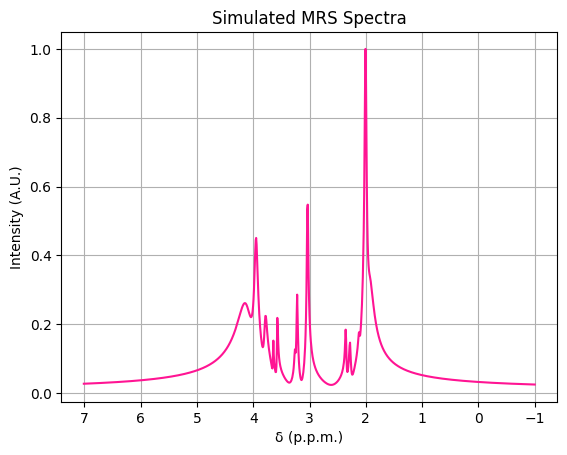

In [4]:
pop = pymri.population(ws, t2s, M_0s, spins_phi)

sig, t = pymri.population_transverse_decay( t0, tn, dt, pop)
freqs, sig_fft = pymri.fourier_spectrum( sig, dt, B0 )
sig_fft = sig_fft/np.max(sig_fft)
sig = np.fft.ifft(np.fft.ifftshift(sig_fft))

pymri.plot_chem_shifts(freqs, sig_fft)

In [38]:
loc = 0.0
scale = 0.005

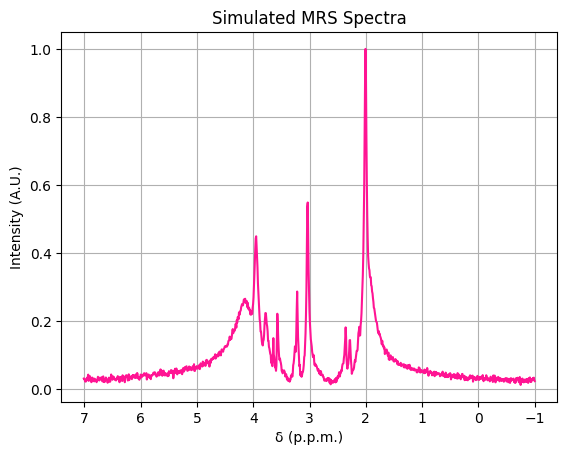

In [29]:
noise = 1*np.random.normal(loc, scale, 2048) + 1j*np.random.normal(loc, scale, 2048)

c_sig_fft = sig_fft + noise
pymri.plot_chem_shifts(freqs, c_sig_fft)

In [30]:
print(pymri.snr(c_sig_fft, 0.1))

95.78254270923043


Text(0, 0.5, 'SNR (u.a.)')

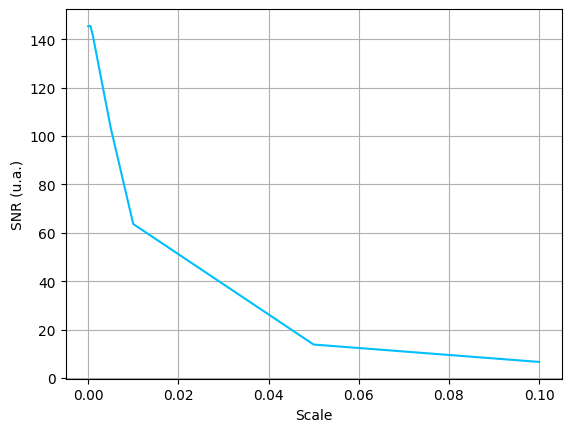

In [49]:
scales = np.array([0.1, 0.05, 0.01, 0.005, 0.001, 0.0005, 0.0001, 0.00005, 0.00001])
snrs = np.zeros_like(scales)
for i in range(scales.size):
    noises = 1*np.random.normal(loc, scales[i], 2048) + 1j*np.random.normal(loc, scales[i], 2048)
    snrs[i] = pymri.snr(sig_fft + noises)

plt.plot(scales, snrs, c = "deepskyblue")
plt.grid()
plt.xlabel("Scale")
plt.ylabel("SNR (u.a.)")
    